In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import joblib
from sklearn.manifold import TSNE
from visualizations import *
import os
from models import *

## Load Data

In [14]:
# read data
data_path = "./dataset/preprocessed/CC_GENERAL_log2.csv"

df = pd.read_csv(data_path)

df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.711393           0.818182   4.558183         -4.605170   
1  8.071680           0.909091  -4.605170         -4.605170   
2  7.822108           1.000000   6.650512          6.650512   
3  7.418589           0.636364   7.312560          7.312560   
4  6.706525           1.000000   2.773214          2.773214   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.558183     -4.605170             0.166667   
1               -4.605170      8.770743             0.000000   
2               -4.605170     -4.605170             1.000000   
3               -4.605170      5.326895             0.083333   
4               -4.605170     -4.605170             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000         -4.605170       0.698135      6.907765   
1                0.250000          1.388791      -4.605170      8.853667   
2                0.000000         -4.605170       2.485740      8.922660   
3                0.083333          0.009950       0.009950      8.922660   
4                0.000000         -4.605170       0.009950      7.090085   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  5.307337          4.938206          0.000000      12  
1  8.319484          6.977608          0.222222      12  
2  6.433063          6.441417          0.000000      12  
3 -4.605170         -4.605170          0.000000      12  
4  6.519656          5.500447          0.000000      12

## Load Scalers

In [15]:
dir_path = "./transformers"

# Load each scaler
z_scaler = joblib.load(f"{dir_path}/z_scaler.pkl")
maxabs_scaler = joblib.load(f"{dir_path}/maxabs_scaler.pkl")
minmax_scaler = joblib.load(f"{dir_path}/minmax_scaler.pkl")
robust_scaler = joblib.load(f"{dir_path}/robust_scaler.pkl")

In [16]:
# scale data
df_z_scaled = z_scaler.fit_transform(df)
df_maxabs_scaled = maxabs_scaler.fit_transform(df)
df_minmax_scaled = minmax_scaler.fit_transform(df)
df_robust_scaled = robust_scaler.fit_transform(df)

In [17]:
# print("Original data:\n", df_log1.head())
print("Z Scaled data:\n", df_z_scaled[:2])
print()
print("Maxabs Scaled data:\n", df_maxabs_scaled[:2])
print()
print("MinMax Scaled data:\n", df_minmax_scaled[:2])
print()
print("Robust Scaled data:\n", df_robust_scaled[:2])

Z Scaled data:
 [[-1.0649815  -0.24988139  0.15056818 -1.01997081  0.60680149 -0.95292396
  -0.80664908 -0.67871619 -0.70740935 -0.67529446 -0.9413752  -0.0055724
  -1.44716805 -0.54736245 -0.33374929 -0.52558844  0.36054128]
 [ 0.88301211  0.1340494  -1.77829718 -1.01997081 -1.11835006  1.34743216
  -1.22192823 -0.67871619 -0.91708951  0.57394905  1.00524107 -1.72726791
   0.92594658  0.83657258  0.64858859  0.2341587   0.36054128]]

Maxabs Scaled data:
 [[ 0.37662052  0.818182    0.42203905 -0.43381618  0.45485082 -0.42795725
   0.166667    0.          0.083333    0.         -0.95696508  0.11871907
   0.67007438  0.48987313  0.43919297  0.          1.        ]
 [ 0.8190888   0.909091   -0.42638953 -0.43381618 -0.45953953  0.8150628
   0.          0.          0.          0.16666667  0.28859405 -0.7831175
   0.85883279  0.76789768  0.62057276  0.222222    1.        ]]

MinMax Scaled data:
 [[0.57515728 0.818182   0.59480847 0.         0.62649235 0.
  0.166667   0.         0.083333   0.

In [18]:
m_features = df.shape[1]

# Visualization

## PCA

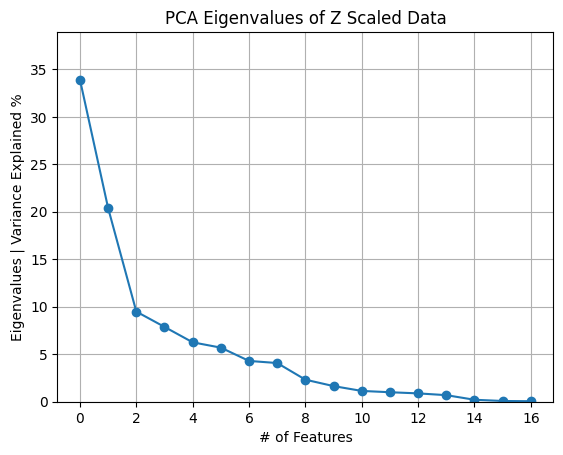

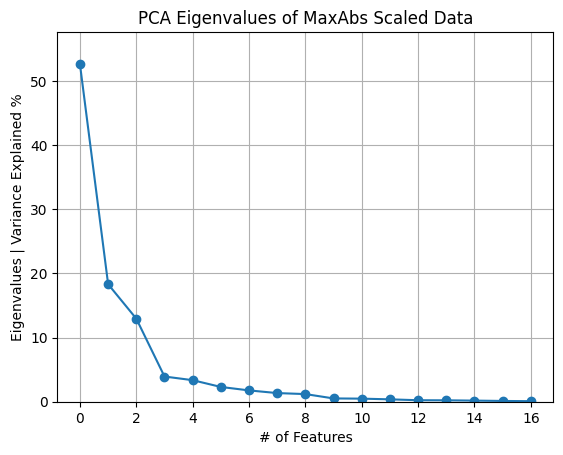

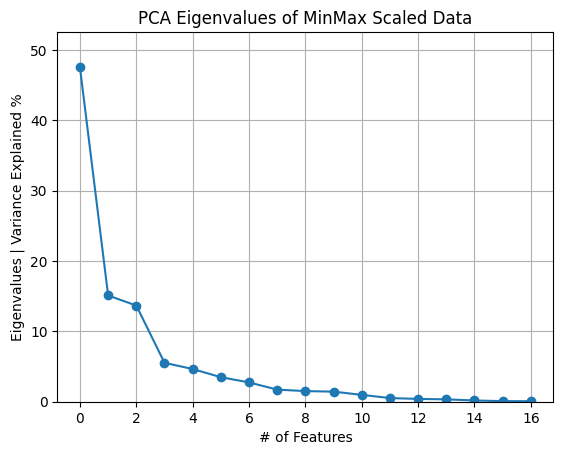

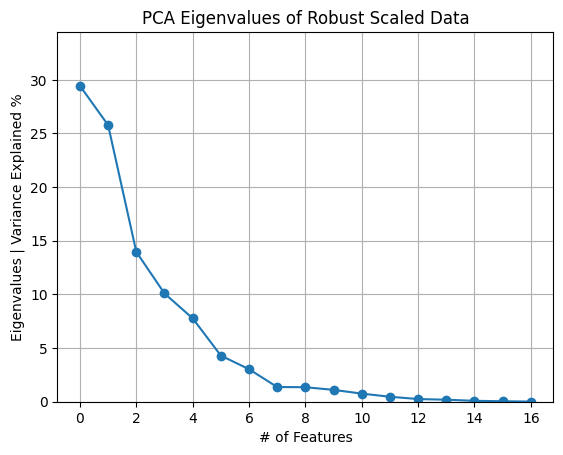

In [19]:
scaled_data = {
    "Z Scaled": df_z_scaled,
    "MaxAbs Scaled": df_maxabs_scaled,
    "MinMax Scaled": df_minmax_scaled,
    "Robust Scaled": df_robust_scaled
}

# store each PCA object
pca_results = {}
# store reduced dims. data
all_pca_data = {}

for name, data in scaled_data.items():
    pca = PCA(n_components=m_features)
    pca.fit(data)
    pca_data = pca.transform(data)
    
    # append to dicts
    all_pca_data[name] = pca_data
    pca_results[name] = pca
    
    screen_plot(pca, name)

In [20]:
rows = []

for s_data, pca in pca_results.items():
    explained_variance = pca.explained_variance_
    total_variance = np.sum(explained_variance)

    row_dict = {"Scaling": s_data}

    for k in range(2, m_features + 1):
        explained = np.sum(explained_variance[:k]) / total_variance
        row_dict[f"PC_{k}"] = explained * 100

    rows.append(row_dict)

# Create DataFrame
pivot_df = pd.DataFrame(rows)

# Set scaling as index
pivot_df = pivot_df.set_index("Scaling")

# Round for readability
pivot_df = pivot_df.round(2)

display(pivot_df)


PC_2   PC_3   PC_4   PC_5   PC_6   PC_7   PC_8   PC_9  PC_10  \
Scaling                                                                        
Z Scaled       54.31  63.80  71.67  77.93  83.62  87.92  91.99  94.31  95.96   
MaxAbs Scaled  70.96  83.91  87.84  91.20  93.51  95.27  96.62  97.81  98.32   
MinMax Scaled  62.67  76.35  81.89  86.54  90.03  92.77  94.49  96.00  97.44   
Robust Scaled  55.22  69.19  79.28  87.05  91.35  94.38  95.75  97.10  98.21   

               PC_11  PC_12  PC_13  PC_14  PC_15  PC_16  PC_17  
Scaling                                                         
Z Scaled       97.09  98.09  98.97  99.66  99.87  99.95  100.0  
MaxAbs Scaled  98.80  99.17  99.41  99.62  99.80  99.92  100.0  
MinMax Scaled  98.41  98.93  99.33  99.67  99.85  99.93  100.0  
Robust Scaled  98.96  99.42  99.67  99.86  99.94  99.99  100.0

From the table above, we observe that for **Z-standardized data**, the first **6 principal components** capture approximately **83.62%** of the total variance, meaning that most of the information in the dataset can be represented using only 6 components instead of the original 17 features.

In contrast, for **MaxAbs-scaled data**, around **83%** of the variance is already captured using only **3 principal components**, indicating that the variance is more concentrated in the first few components. After approximately 6–8 principal components, the additional explained variance increases only marginally, suggesting diminishing returns from including more components.

In [21]:
# visualize 3D scatter plot of the first 3 principal components for each scaled dataset
for name, pca_data in all_pca_data.items():
    scatter_plot3D(pca_data, color=None, title=name)

From the 3D Graph that plots the scaled data using 3 PCA's we can see that the customer is sgmented into about 4-6 segments in MinMax and MaxAbs scaled data, while in Robust and Z-standardized data the segmets is densed and no separation between them.

So we can stick to Max Abs scaled data as the first 3PCA's capture more information compared to MinMax Scaled data.

## t-SNE

In [22]:
perplexities = [30, 40, 50]

# grid layout (n_sclaed_data, n_perplexities)
n_rows = len(scaled_data)
n_cols = len(perplexities)

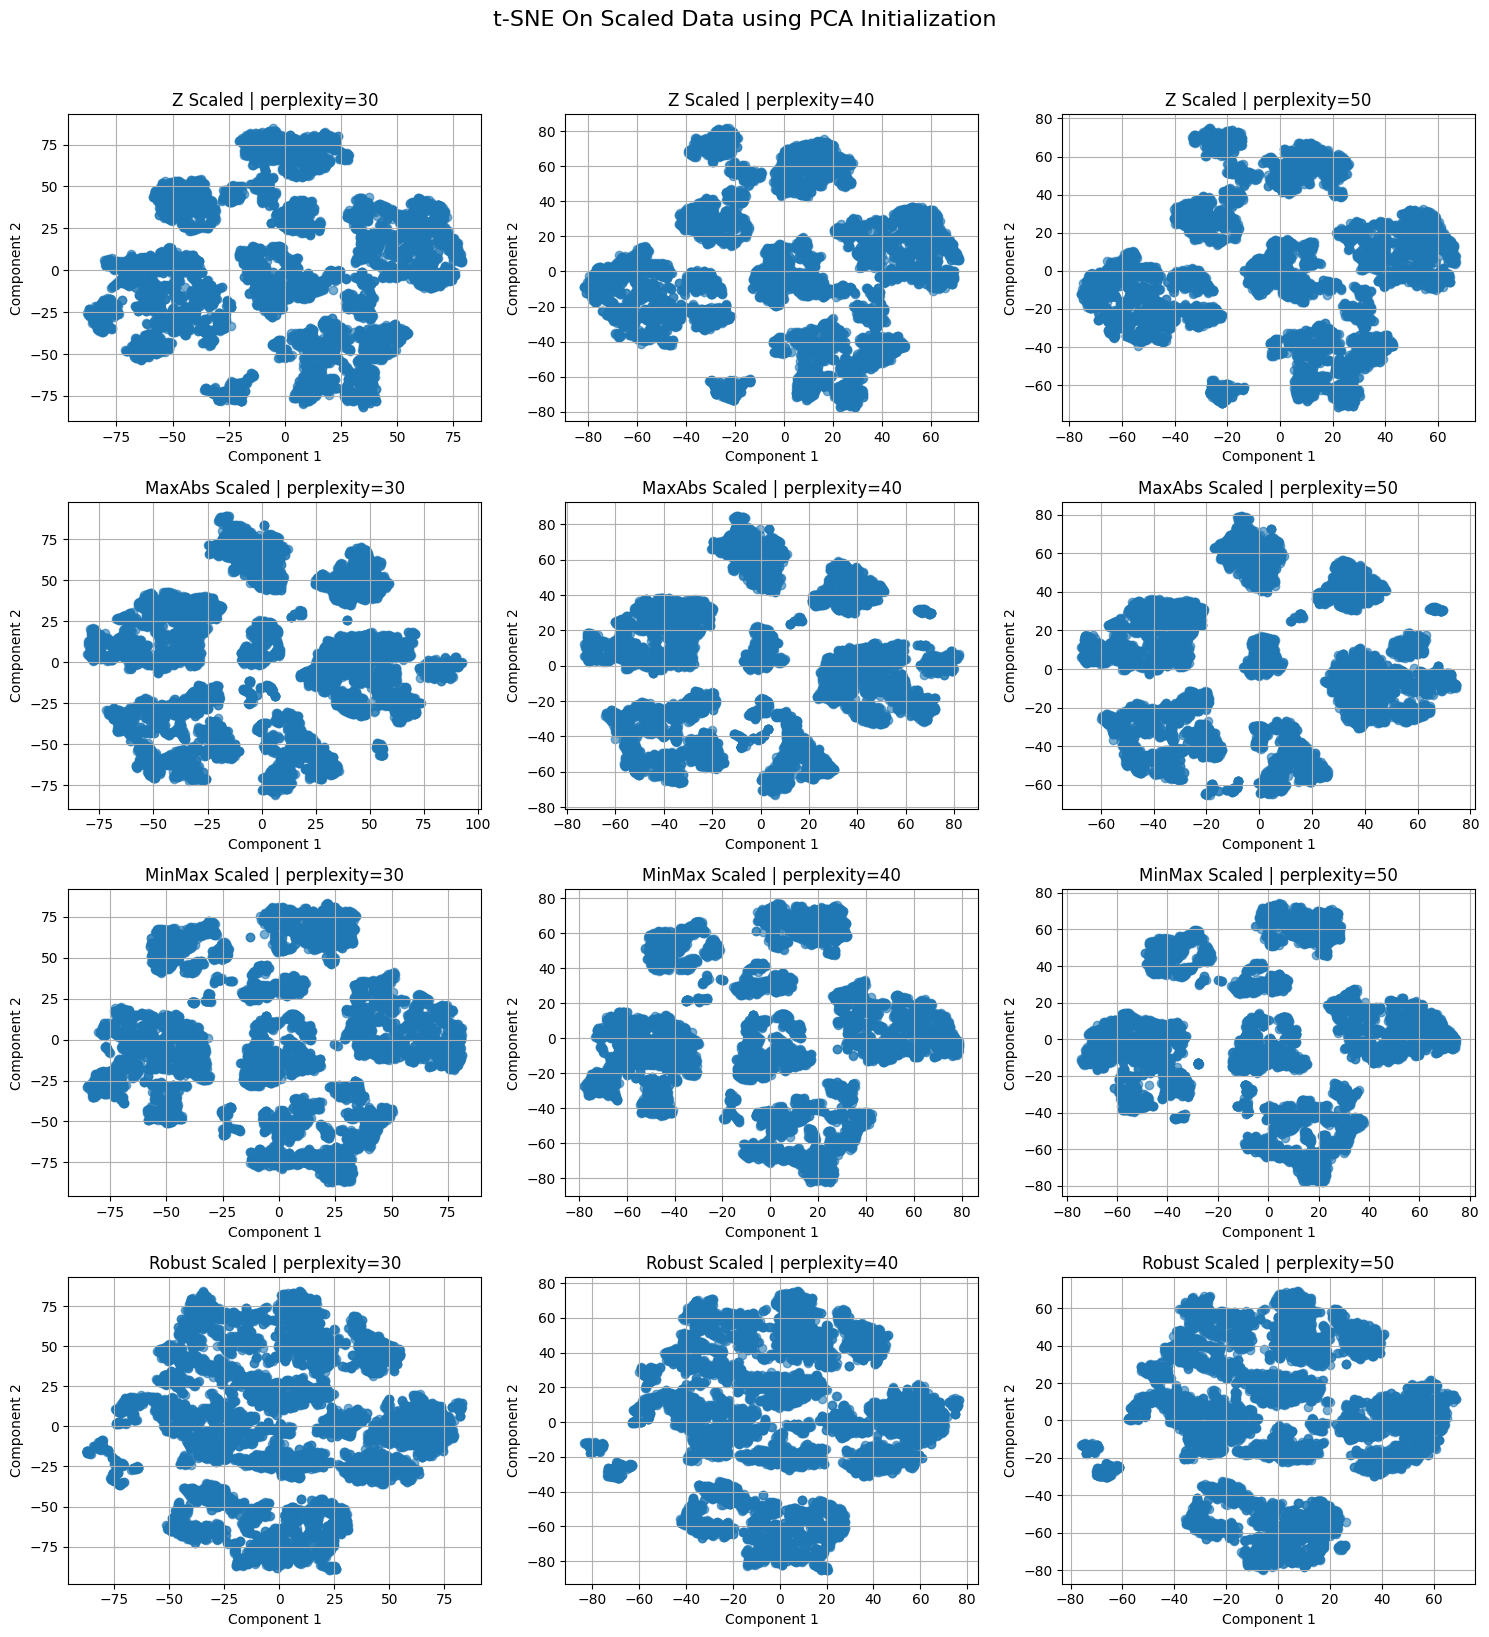

In [23]:
tsne_grid_plot(scaled_data, perplexities, n_rows, n_cols, init_state="pca", main_title="t-SNE On Scaled Data using PCA Initialization")

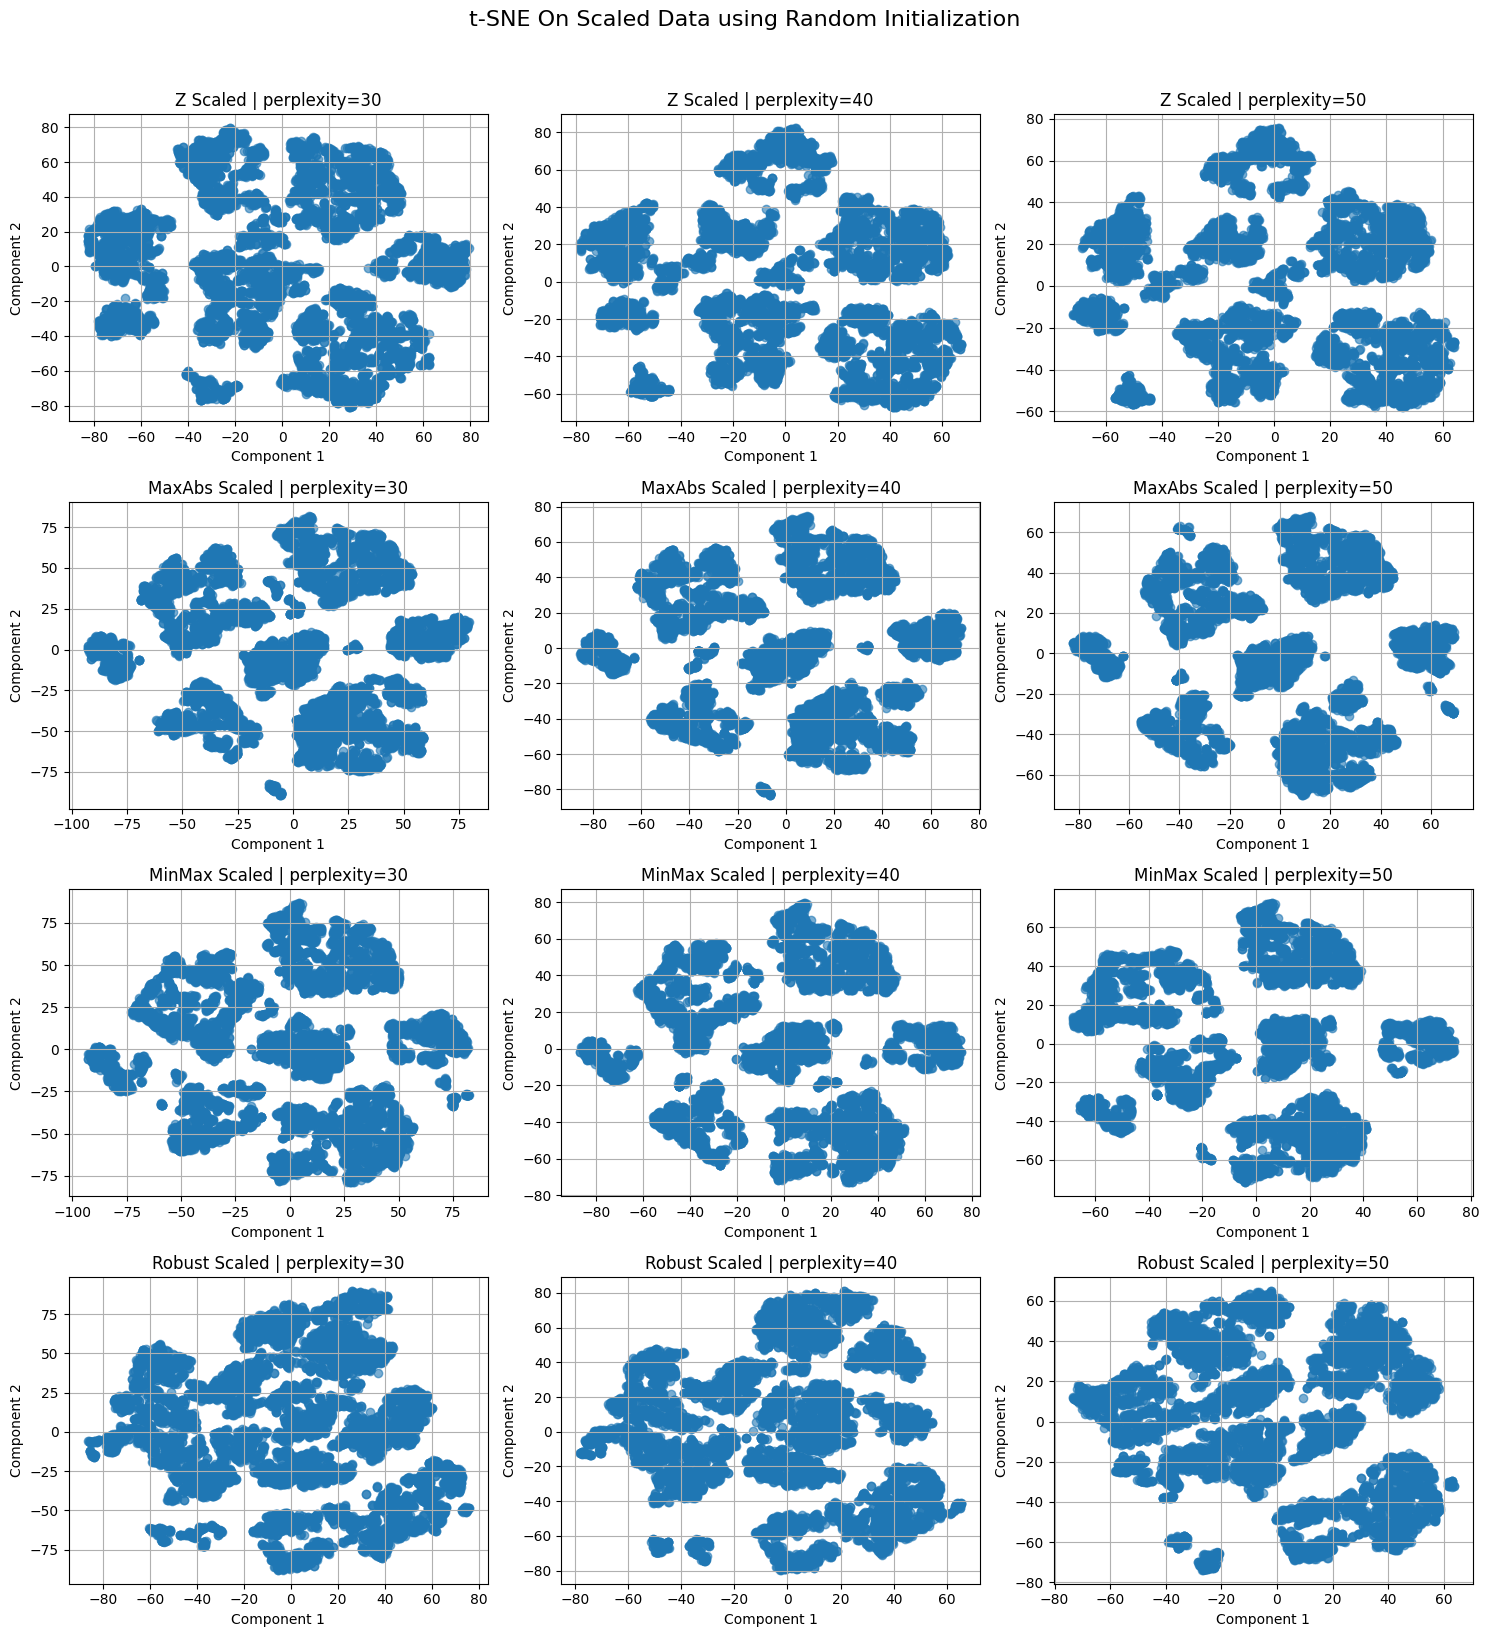

In [24]:
tsne_grid_plot(scaled_data, perplexities, n_rows, n_cols, init_state="random", main_title="t-SNE On Scaled Data using Random Initialization")

From the two graphs, there is an intuition that the segments of customers might be 5–8, especially since the max-absolute and min-max scaled data that we applied t-SNE on show remarkable clustering after a perplexity of 30. In contrast, the z-normalized data shows a small overlap, with clusters close to each other in the reduced space. From a business perspective, we have customer segments that differ from each other.

So we will Stick to PCA object related to MaxAbslute Scaled data, and will train our model on PCA-Reduced MaxAbs data.

In [25]:
# save MaxAbs PCA object
pca_maxabs_obj = pca_results["MaxAbs Scaled"]

joblib.dump(pca_maxabs_obj, "./transformers/pca_model.pkl")

['./transformers/pca_model.pkl']

# Models

We will use MaxAbs-scaled data for training our models, experimenting with both the PCA-reduced scaled data and the original scaled data with full dimensions.

In [26]:
mxabs_dimred_data = all_pca_data["MaxAbs Scaled"]
mxabs_orig_data = df_maxabs_scaled.copy()

In [27]:
param_grid_dbscan = {
    "eps": [0.3, 0.5, 0.6, 0.7],
    "min_samples": [5, 10, 15, 20]
}

param_grid_hdbscan = {
    "min_cluster_size": [10, 20, 30, 40, 50],
    "min_samples": [5, 10, 15, 20]
}

param_grid_optics = {"min_samples": [10, 40, 60, 80]}

## EXP1: PCA-Reduced Data

In [28]:
# we will extract the first 6 PC that captures 93% of information
mxabs_dimred_data_filtered = mxabs_dimred_data[:, :6]

**Trying Different Parameters to Select the Best Ones That Maximize the Silhouette Score for Training the Three Models**

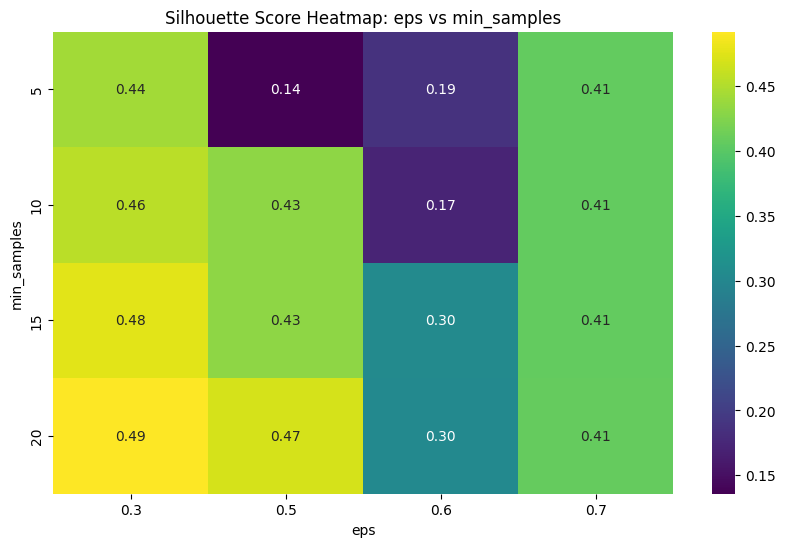

Best Silhouette Score: 0.4921
Best Parameters: {'eps': 0.3, 'min_samples': 20}


In [29]:
exp1_best_params_db, exp1_best_score_db = silhouette_heatmap_best_params(
    train_fit_dbscan_model,
    param_grid_dbscan,
    mxabs_dimred_data_filtered,
    x_param_name="eps",
    y_param_name="min_samples"
)

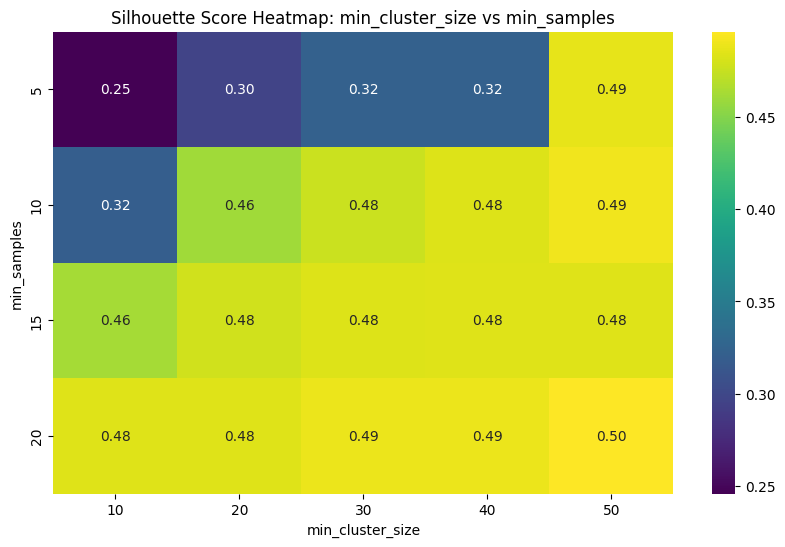

Best Silhouette Score: 0.4963
Best Parameters: {'min_cluster_size': 50, 'min_samples': 20}


In [30]:
exp1_best_params_hdb, exp1_best_score_hdb = silhouette_heatmap_best_params(
    train_fit_hdbscan_model,
    param_grid_hdbscan,
    mxabs_dimred_data_filtered,
    x_param_name="min_cluster_size",
    y_param_name="min_samples"
)


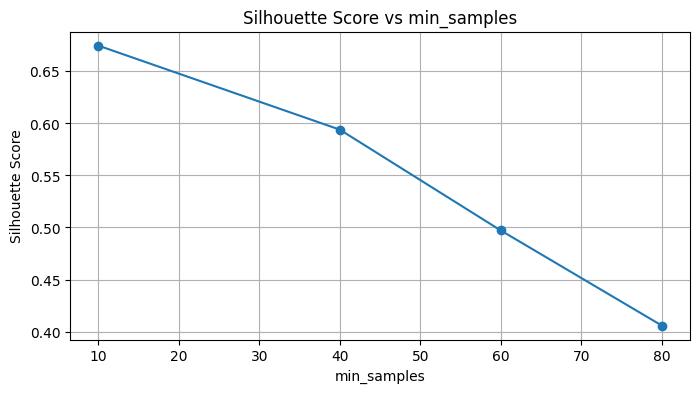

Best Silhouette Score: 0.6746
Best Parameters: {'min_samples': 10}


In [31]:
exp1_best_params_opt, exp1_best_score_opt = silhouette_heatmap_best_params(
    train_fit_optics_model,
    param_grid_optics,
    mxabs_dimred_data_filtered,
    x_param_name="min_samples"
)

In [32]:
db_eps, db_min_samples = exp1_best_params_db["eps"], exp1_best_params_db["min_samples"]
hdb_min_cluster_size, hdb_min_samples = exp1_best_params_hdb["min_cluster_size"], exp1_best_params_hdb["min_samples"]
opt_min_samples = exp1_best_params_opt["min_samples"]

In [33]:
db_exp1, db_labels_exp1 = train_fit_dbscan_model(mxabs_dimred_data_filtered, eps=db_eps, min_samples=db_min_samples)
hdbscan_exp1, hdbscan_labels_exp1 = train_fit_hdbscan_model(mxabs_dimred_data_filtered, min_cluster_size=hdb_min_cluster_size, min_samples=hdb_min_samples)
opt_exp1, opt_labels_exp1 = train_fit_optics_model(mxabs_dimred_data_filtered, min_samples=opt_min_samples)

print(f"Unique Clusters (DBSCAN): {len(set(db_labels_exp1))} Clusters")
print(f"Unique Clusters (HDBSCAN): {len(set(hdbscan_labels_exp1))} Clusters")
print(f"Unique Clusters (OPTICS): {len(set(opt_labels_exp1))} Clusters")

Unique Clusters (DBSCAN): 11 Clusters
Unique Clusters (HDBSCAN): 9 Clusters
Unique Clusters (OPTICS): 61 Clusters


In [34]:
# 3D scatter with cluster labels
scatter_plot3D(mxabs_dimred_data_filtered, color=db_labels_exp1, title="DBSCAN Clusters (3D)")
scatter_plot3D(mxabs_dimred_data_filtered, color=hdbscan_labels_exp1, title="HDBSCAN Clusters (3D)")
scatter_plot3D(mxabs_dimred_data_filtered, color=opt_labels_exp1, title="OPTICS Clusters (3D)")

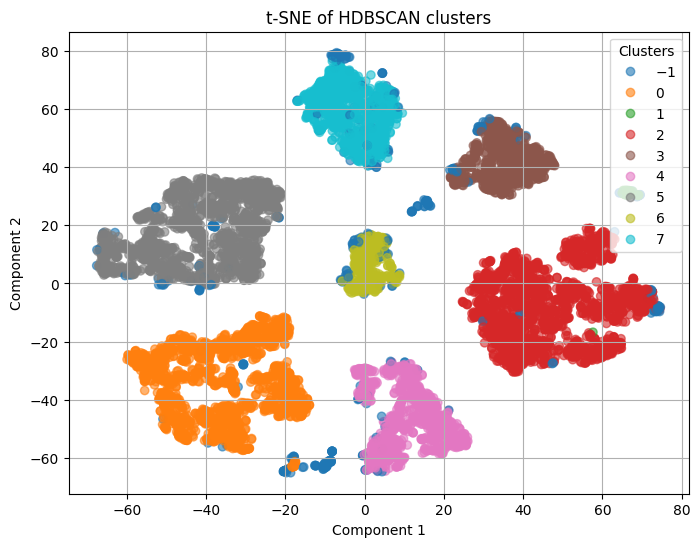

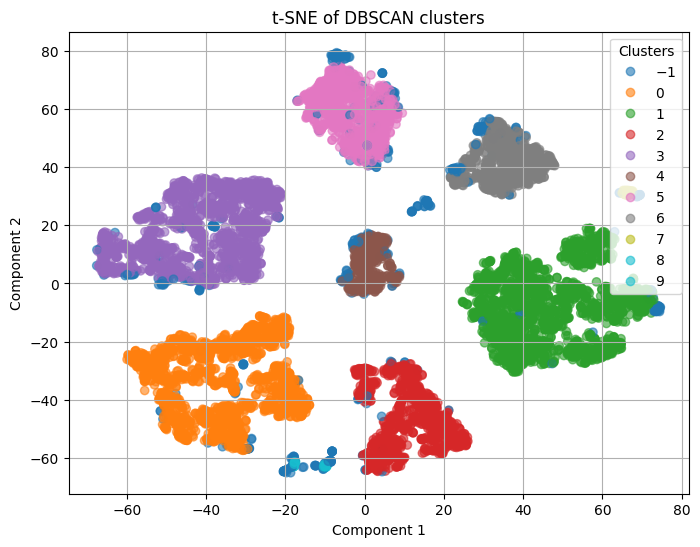

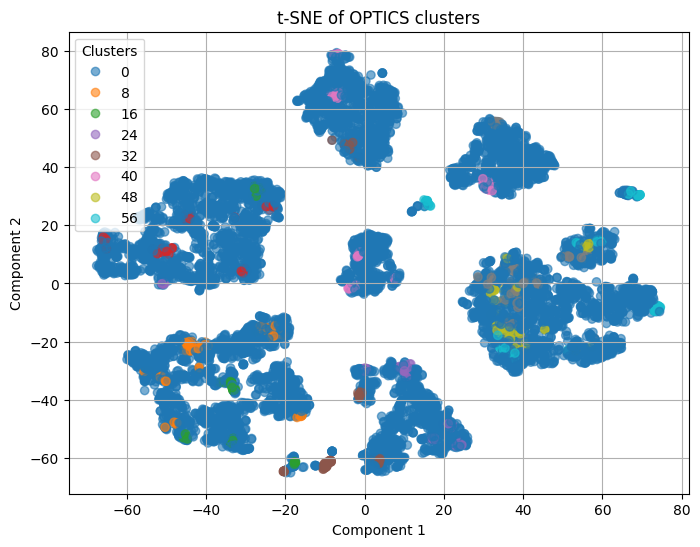

In [52]:
data_emb_db_exp1 = tsne_2d_plot(mxabs_orig_data, labels=hdbscan_labels_exp1, title="t-SNE of HDBSCAN clusters")
data_emb_hdbs_exp1 = tsne_2d_plot(mxabs_orig_data, labels=db_labels_exp1, title="t-SNE of DBSCAN clusters")
data_emb_opt_exp1 = tsne_2d_plot(mxabs_orig_data, labels=opt_labels_exp1, title="t-SNE of OPTICS clusters")

### EXP2: Original Scaled Data

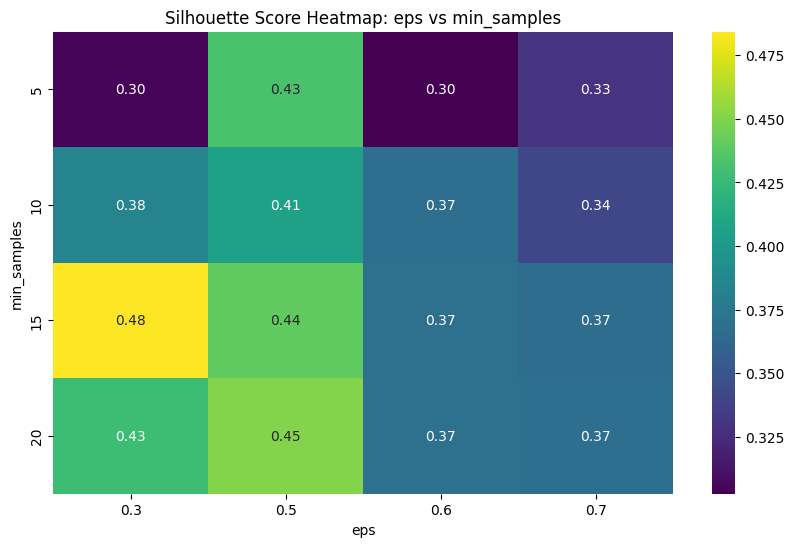

Best Silhouette Score: 0.4843
Best Parameters: {'eps': 0.3, 'min_samples': 15}


In [38]:
exp2_best_params_db, exp2_best_score_db = silhouette_heatmap_best_params(
    train_fit_dbscan_model,
    param_grid_dbscan,
    mxabs_orig_data,
    x_param_name="eps",
    y_param_name="min_samples"
)

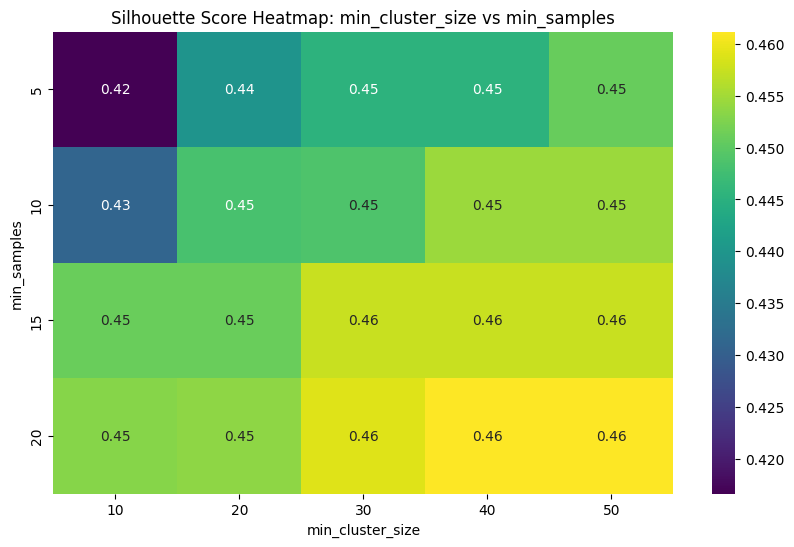

Best Silhouette Score: 0.4612
Best Parameters: {'min_cluster_size': 40, 'min_samples': 20}


In [39]:
exp2_best_params_hdb, exp2_best_score_hdb = silhouette_heatmap_best_params(
    train_fit_hdbscan_model,
    param_grid_hdbscan,
    mxabs_orig_data,
    x_param_name="min_cluster_size",
    y_param_name="min_samples"
)


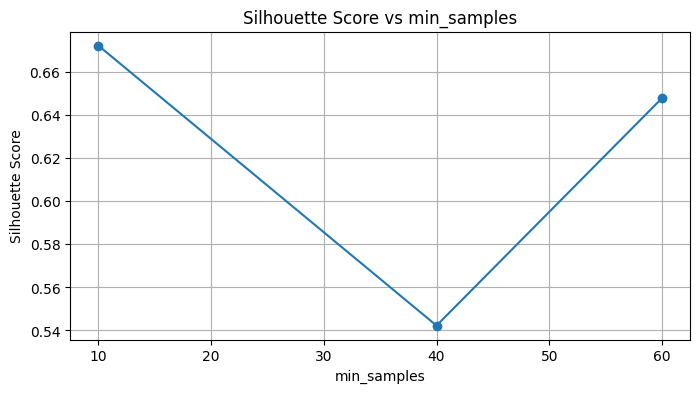

Best Silhouette Score: 0.6721
Best Parameters: {'min_samples': 10}


In [40]:
exp2_best_params_opt, exp2_best_score_opt = silhouette_heatmap_best_params(
    train_fit_optics_model,
    param_grid_optics,
    mxabs_orig_data,
    x_param_name="min_samples"
)

In [41]:
exp2_db_eps, exp2_db_min_samples = exp2_best_params_db["eps"], exp2_best_params_db["min_samples"]
exp2_hdb_min_cluster_size, exp2_hdb_min_samples = exp2_best_params_hdb["min_cluster_size"], exp2_best_params_hdb["min_samples"]
exp2_opt_min_samples = exp2_best_params_opt["min_samples"]

In [42]:
# fit models
db_exp2, db_labels_exp2 = train_fit_dbscan_model(mxabs_orig_data, eps=exp2_db_eps, min_samples=exp2_db_min_samples)
hdbscan_exp2, hdbscan_labels_exp2 = train_fit_hdbscan_model(mxabs_orig_data, min_cluster_size=exp2_hdb_min_cluster_size, min_samples=exp2_hdb_min_samples)
opt_exp2, opt_labels_exp2 = train_fit_optics_model(mxabs_orig_data, min_samples=exp2_opt_min_samples)

print(f"Unique Clusters (DBSCAN): {len(set(db_labels_exp2))} Clusters")
print(f"Unique Clusters (HDBSCAN): {len(set(hdbscan_labels_exp2))} Clusters")
print(f"Unique Clusters (OPTICS): {len(set(opt_labels_exp2))} Clusters")

Unique Clusters (DBSCAN): 12 Clusters
Unique Clusters (HDBSCAN): 9 Clusters
Unique Clusters (OPTICS): 26 Clusters


In [43]:
# 3D scatter with cluster labels
scatter_plot3D(mxabs_orig_data, color=db_labels_exp2, title="DBSCAN Clusters (3D) on Original Data")
scatter_plot3D(mxabs_orig_data, color=hdbscan_labels_exp2, title="HDBSCAN Clusters (3D) on Original Data")
scatter_plot3D(mxabs_orig_data, color=opt_labels_exp2, title="OPTICS Clusters (3D) on Original Data")

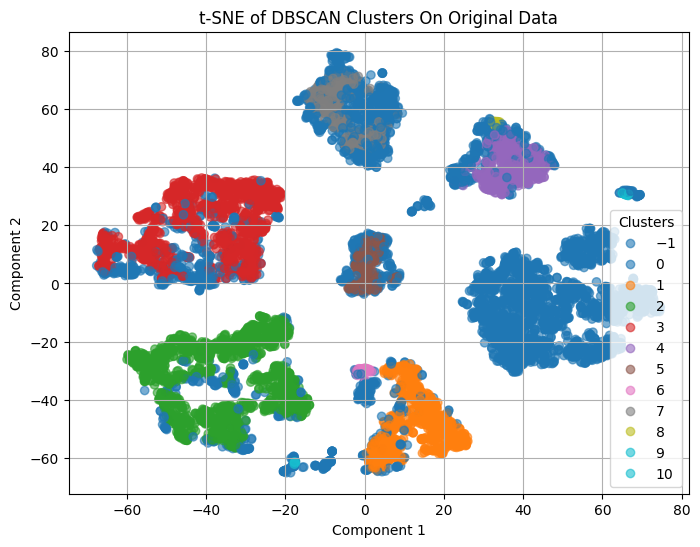

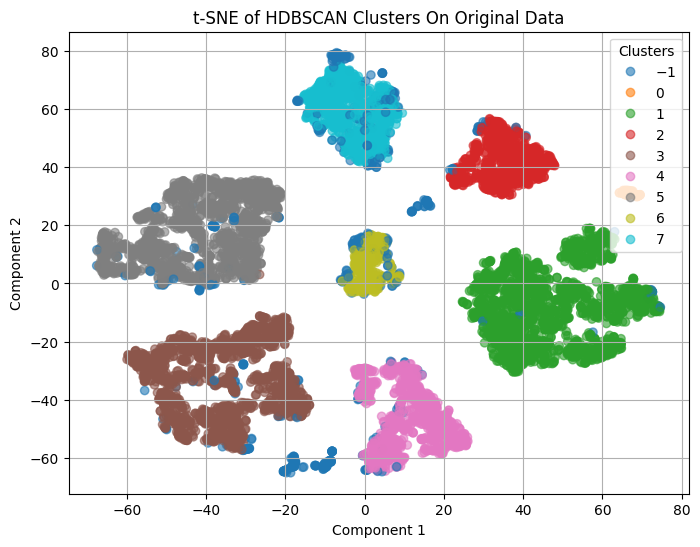

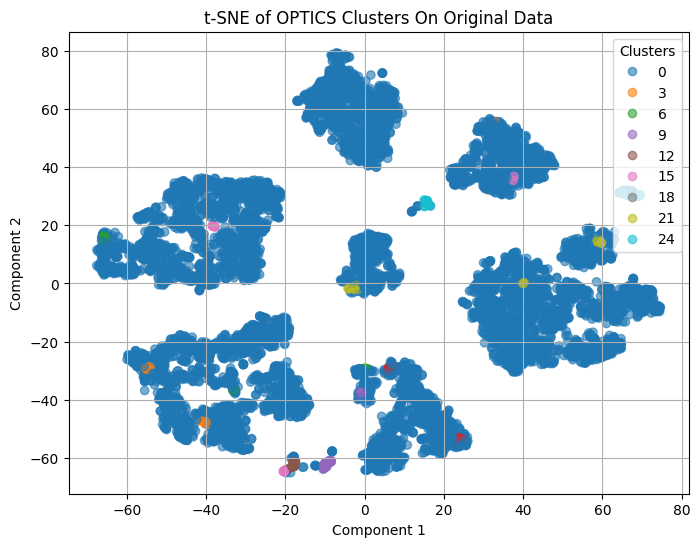

In [53]:
data_emb_db_exp2 = tsne_2d_plot(mxabs_orig_data, labels=db_labels_exp2, title="t-SNE of DBSCAN Clusters On Original Data")
data_emb_hdbs_exp2 = tsne_2d_plot(mxabs_orig_data, labels=hdbscan_labels_exp2, title="t-SNE of HDBSCAN Clusters On Original Data")
data_emb_opt_exp2 = tsne_2d_plot(mxabs_orig_data, labels=opt_labels_exp2, title="t-SNE of OPTICS Clusters On Original Data")

#### Count Class Distribution within each Model in each Experiment

In [60]:
def cluster_distribution_pivot(title, labels_dict):
    all_data = []

    for model_name, labels in labels_dict.items():
        values, counts = np.unique(labels, return_counts=True)
        
        for v, c in zip(values, counts):
            all_data.append({
                "Model": model_name,
                "Cluster": v,
                "Count": c
            })
    
    df = pd.DataFrame(all_data)
    
    pivot = df.pivot(index="Cluster", columns="Model", values="Count").fillna(0)
    
    print(f"\n{title}")
    print("=" * len(title))
    
    return pivot

In [62]:
# PCA-Reduced Data
pca_labels = {
    "DBSCAN": db_labels_exp1,
    "HDBSCAN": hdbscan_labels_exp1,
    "OPTICS": opt_labels_exp1
}

pivot_pca = cluster_distribution_pivot("PCA-Reduced Data", pca_labels)
display(pivot_pca.head(12))


PCA-Reduced Data


Model    DBSCAN  HDBSCAN  OPTICS
Cluster                         
-1        472.0    420.0  7908.0
 0       1717.0   1765.0    28.0
 1       1936.0     53.0    10.0
 2        996.0   1940.0    17.0
 3       1681.0    742.0    11.0
 4        413.0    992.0    12.0
 5        919.0   1695.0    19.0
 6        720.0    417.0    14.0
 7         49.0    925.0    43.0
 8         22.0      0.0    13.0
 9         24.0      0.0    10.0
 10         0.0      0.0    13.0

In [63]:
# Full-Dimension Data
raw_labels = {
    "DBSCAN": db_labels_exp2,
    "HDBSCAN": hdbscan_labels_exp2,
    "OPTICS": opt_labels_exp2
}

pivot_raw = cluster_distribution_pivot("Full Raw Data", raw_labels)
display(pivot_raw.head(12))


Full Raw Data


Model    DBSCAN  HDBSCAN  OPTICS
Cluster                         
-1       2029.0    518.0  8505.0
 0       1849.0     68.0    25.0
 1        801.0   1960.0    15.0
 2       1572.0    757.0    19.0
 3       1392.0   1702.0    10.0
 4        507.0    987.0    12.0
 5        293.0   1688.0    26.0
 6         56.0    392.0    18.0
 7        382.0    877.0    16.0
 8         27.0      0.0    22.0
 9         24.0      0.0    13.0
 10        17.0      0.0    27.0

## Conclusion

From our experiments with the models (DBSCAN, HDBSCAN, and OPTICS) on both the original scaled data and the PCA-reduced data, it is evident that the PCA-reduced dataset shows better separation and can therefore be highlighted.

### PCA-Reduced Data

HDBSCAN produced 9 clusters (including outliers) in both the original scaled data and the PCA-reduced data (i.e., the data containing the features with the most informative variance). This reasonably satisfies our initial assumption that the number of clusters might range between 5–8 segments.

There is not much overlapping between clusters in HDBSCAN compared to OPTICS. OPTICS generated more than 50 clusters, and many of them overlap. This is not a good intuition, as a large number of clusters means the model groups very small numbers of customers into many segments.

On the other hand, DBSCAN divided the segments more efficiently compared to OPTICS. However, there are three clusters (Cluster 7, 8, and 9) that appear to be very close to each other. Based on the t-SNE visualization, these clusters could potentially be grouped into a single cluster.

Therefore, HDBSCAN divides the data into a reasonable number of clusters (effectively around 8 meaningful clusters) with acceptable separation between them.

### Original Scaled Data (17 Features)

We observe a similar behavior when using the original scaled data while keeping all 17 features without dimensionality reduction. However, we face an issue: there is a large number of outliers detected by all three models.

This may affect the segmentation process, as these outliers:
- Differ significantly from the main clusters,
- Show dissimilarities compared to other segments,
- Cannot be confidently assigned to a specific cluster.

### PCA Justification

The first six principal components capture approximately 93% of the total variance. This makes PCA not only effective for dimensionality reduction but also reliable in preserving the structure required to separate the data efficiently.

### Final Decision

We will use the HDBSCAN model trained on the PCA-reduced data using the first six principal components, which capture approximately 93% of the total information.

### The Pipeline
Raw data → log2 transformation → scaled → PCA → cluster model (HDBSCAN)

In [64]:
# Attach labels to log2-transformed data for interpretation
df_with_clusters = df.copy()
df_with_clusters['cluster'] = hdbscan_labels_exp1

df_with_clusters.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.711393           0.818182   4.558183         -4.605170   
1  8.071680           0.909091  -4.605170         -4.605170   
2  7.822108           1.000000   6.650512          6.650512   
3  7.418589           0.636364   7.312560          7.312560   
4  6.706525           1.000000   2.773214          2.773214   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.558183     -4.605170             0.166667   
1               -4.605170      8.770743             0.000000   
2               -4.605170     -4.605170             1.000000   
3               -4.605170      5.326895             0.083333   
4               -4.605170     -4.605170             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000         -4.605170       0.698135      6.907765   
1                0.250000          1.388791      -4.605170      8.853667   
2                0.000000         -4.605170       2.485740      8.922660   
3                0.083333          0.009950       0.009950      8.922660   
4                0.000000         -4.605170       0.009950      7.090085   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0  5.307337          4.938206          0.000000      12        0  
1  8.319484          6.977608          0.222222      12        2  
2  6.433063          6.441417          0.000000      12        4  
3 -4.605170         -4.605170          0.000000      12       -1  
4  6.519656          5.500447          0.000000      12        4

In [65]:
df_with_clusters["cluster"].value_counts()

cluster
 2    1940
 0    1765
 5    1695
 4     992
 7     925
 3     742
-1     420
 6     417
 1      53
Name: count, dtype: int64

By comparing Models After being evaluated using silhoutte score and dbvc:

1- DBSCAN produced reasonable number of segments in silhoutte score, and a strict number when evaluated using dbvc

2- HDBSCAN produced in-between number of segments after being evaluated using silhoutte score so we will use its params.

In [66]:
save_dir = "./saved_models"

# Create directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save to be used model
joblib.dump(hdbscan_exp1, os.path.join(save_dir, "hdbscan_model.pkl"))

['./saved_models\\hdbscan_model.pkl']

In [67]:
dataset_final_dir = "./dataset/final_version"

# Create directory if it doesn't exist
os.makedirs(dataset_final_dir, exist_ok=True)

# save clustered dataset
df_with_clusters.to_csv(f"{dataset_final_dir}/CC_Customers_Clustered_EXP-V1.csv", index=False)